In [63]:
import pandas as pd

In [200]:
use_case = '19i'
#indoor = 19i
#low_mobility = 18w2, same ticks as indoor
#moderate Mobility - 23m and has 3 minutes of ticks
#extreme = mc5, has 5 ticks
indoor_ticks = 6
# moderate_ticks = 3
# extreme_ticks = 5

In [201]:
ticks = indoor_ticks

In [202]:
df = pd.read_csv("logfiles/all/"+use_case+".txt", sep='\t')

In [203]:
# df = df.iloc[36:-14]

In [204]:
# df.columns

In [205]:
df = df[['Timestamp','NetworkTech','NetworkMode','Level','Qual','SNR','CQI','LTERSSI','ARFCN','DL_bitrate','UL_bitrate','State','EVENT']]

In [206]:
df[35:40]

,Timestamp,NetworkTech,NetworkMode,Level,Qual,SNR,CQI,LTERSSI,ARFCN,DL_bitrate,UL_bitrate,State,EVENT
35,2024.02.19_10.11.50,5G,5G,-108,-12,4.0,-,-,520110,8,15,D,PERIODIC
36,2024.02.19_10.11.51,5G,5G,-108,-12,3.0,-,-,520110,7,25,D,PERIODIC
37,2024.02.19_10.11.52,5G,5G,-108,-12,3.0,-,-,520110,3289,71,D,PERIODIC
38,2024.02.19_10.11.53,5G,5G,-108,-12,4.0,-,-,520110,589,29,D,PERIODIC
39,2024.02.19_10.11.54,5G,5G,-108,-12,4.0,-,-,520110,45799,181,D,PERIODIC


In [207]:
df[:1]

,Timestamp,NetworkTech,NetworkMode,Level,Qual,SNR,CQI,LTERSSI,ARFCN,DL_bitrate,UL_bitrate,State,EVENT
0,2024.02.19_10.11.19,5G,5G,-108,-13,3.0,-,-,520110,2,1,D,LOG START


In [208]:
df[-1:]

,Timestamp,NetworkTech,NetworkMode,Level,Qual,SNR,CQI,LTERSSI,ARFCN,DL_bitrate,UL_bitrate,State,EVENT
381,2024.02.19_10.17.18,5G,5G,-104,-12,8.0,-,-,520110,0,0,I,LOG_END


In [194]:
# df[['date', 'time']] = df['Timestamp'].str.split('_', expand=True)

In [195]:
# df['newtime'] = df['time'].str.replace('.', ':', regex=False)

In [196]:
# df['split_timestamp'] = df['newtime'].str.split(':').str[1:]  # Skip the first index
# df['split_timestamp'] = df['newtime'].str.split(':').apply(lambda x: ':'.join(x[1:]))

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme(style="darkgrid")

In [198]:
df.shape

(333, 13)

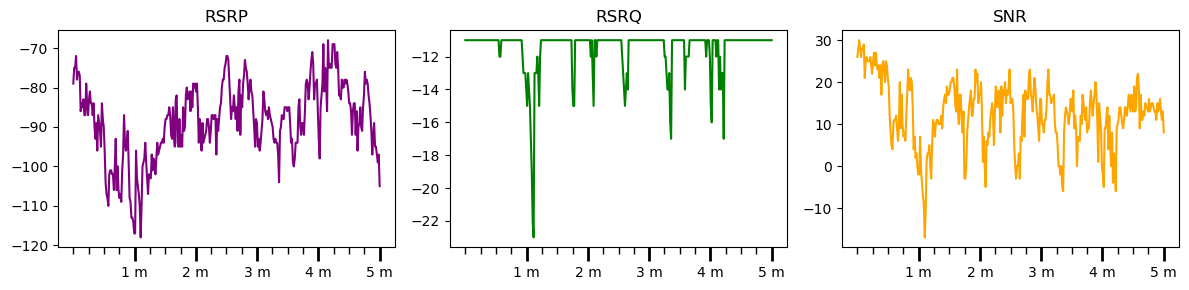

In [199]:
# Example data for a 6-minute time span (600 points representing 6 minutes)
x = np.linspace(0, ticks, df.shape[0])  # 600 data points, from 0 to 6 minutes
fig, axs = plt.subplots(1, 3, figsize=(12, 3))  # Adjust figsize as needed
axs[0].plot(x,df['Level'], 'purple')
axs[0].set_title("RSRP")
axs[1].plot(x,df['Qual'], 'g')
axs[1].set_title("RSRQ")
axs[2].plot(x,df['SNR'], 'orange')
axs[2].set_title("SNR")
minute_ticks = np.arange(1, ticks+1)  # Full minute ticks [1, 2, 3, 4, 5, 6]
quarter_ticks = np.arange(0, ticks + 0.25, 0.25)  # Ticks every 15 seconds (including minutes)
for i, ax in enumerate(axs):
    # Set major ticks at full minutes and minor ticks at every 15 seconds
    ax.set_xticks(minute_ticks, minor=False)  # Major ticks (full minutes)
    ax.set_xticks(quarter_ticks, minor=True)  # Minor ticks (quarter minutes)

    # Customize the appearance of major and minor ticks
    ax.tick_params(axis='x', which='major', length=10, width=2)  # Longer, thicker ticks for full minutes
    ax.tick_params(axis='x', which='minor', length=5, width=1)   # Shorter, thinner ticks for quarter minutes

    # Set labels only at full minutes and leave the quarters blank
    ax.set_xticklabels([f'{int(i)} m' for i in minute_ticks], minor=False)
#     ax.set_title(f"Plot {i + 1}")

plt.tight_layout()
plt.savefig('noms/cross/'+use_case+'_all.pdf')
plt.show()

In [ ]:
# 